In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
Drive_path = '/content/drive/MyDrive/CS4248/output'
os.chdir(Drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FILE_PATH_1 = "/content/drive/MyDrive/CS4248/output/test-xlm-roberta-base-100epochs-my_split=False/eval/mse_evaluation_my_val.tsv.gz_results.csv"
FILE_PATH_2 = "/content/drive/MyDrive/CS4248/output/test-xlm-roberta-base-100epochs-my_split=True/eval/mse_evaluation_my_val.tsv.gz_results.csv"
FILE_PATH_3 = "/content/drive/MyDrive/CS4248/output/test-xlm-roberta-base-200epochs-my_split=False/eval/mse_evaluation_my_val.tsv.gz_results.csv"
FILE_PATH_4 = "/content/drive/MyDrive/CS4248/output/test-xlm-roberta-base-200epochs-my_split=True/eval/mse_evaluation_my_val.tsv.gz_results.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

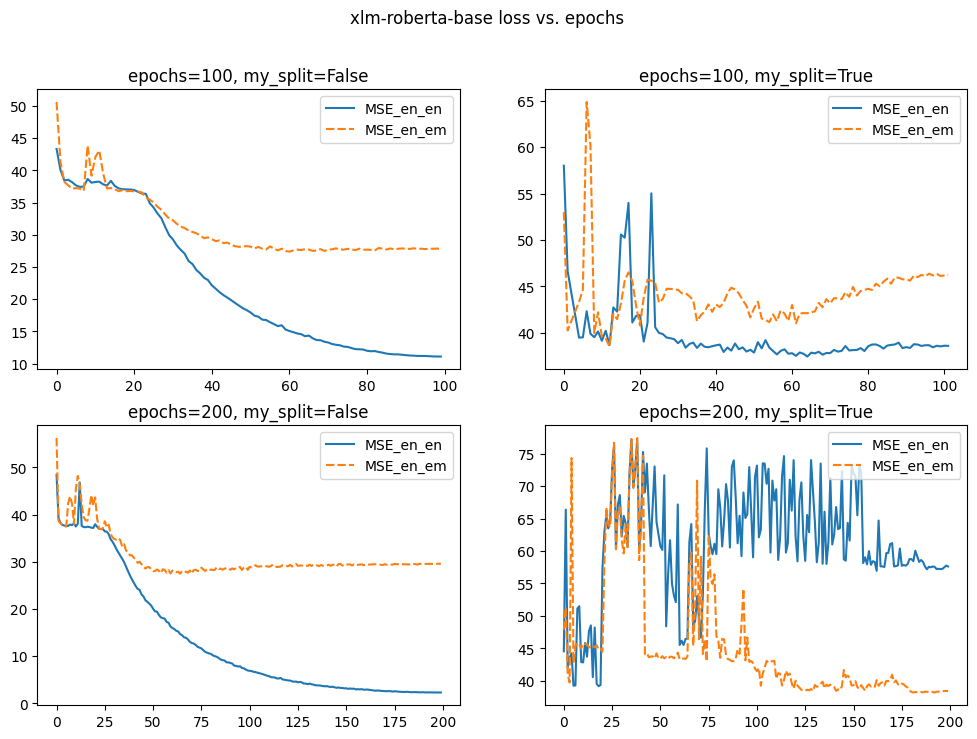

In [ ]:
FILE_NAMES = [FILE_PATH_1, FILE_PATH_2, FILE_PATH_3, FILE_PATH_4]
titles = ['epochs=100, my_split=False', 'epochs=100, my_split=True',
          'epochs=200, my_split=False', 'epochs=200, my_split=True']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('xlm-roberta-base loss vs. epochs')

ind = 0
for file_name in FILE_NAMES:
  j = ind % 2
  i = int(ind/2)
  df = pd.read_csv(file_name, usecols=[0,2])
  en_em = df[df.index % 2 == 0].reset_index(drop=True)
  en_en = df[df.index % 2 != 0].reset_index(drop=True)

  en_em.drop_duplicates(inplace=True, subset=['epoch'], keep='first')
  en_en.drop_duplicates(inplace=True, subset=['epoch'], keep='first')

  df = pd.DataFrame()
  # df['epoch'] = en_en['epoch']
  df['MSE_en_en'] = en_en['MSE']
  df['MSE_en_em'] = en_em['MSE']

  ax = axs[i,j]
  ax.set_title(titles[ind])
  sns.lineplot(data= df, ax=ax)
  plt.title(titles[ind])
  ind += 1
